PROBLEM STATEMENT:
The objective of this project is to develop a machine learning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions

APPROACH:
DATA COLLECTION AND PREPROCESSING:-->FEATURE ENGINEERING-->EXPLORATORY DATA ANALYSIS (EDA)-->MODEL BUILDING AND EVALUATION

In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import pickle

In [3]:
df1=pd.read_csv(r"D:\Desktop\singapore_resale\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


In [4]:
df2=pd.read_csv(r"D:\Desktop\singapore_resale\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


In [5]:
df3=pd.read_csv(r"D:\Desktop\singapore_resale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [6]:
df4=pd.read_csv(r"D:\Desktop\singapore_resale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [7]:
df5=pd.read_csv(r"D:\Desktop\singapore_resale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174351 entries, 0 to 174350
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                174351 non-null  object 
 1   town                 174351 non-null  object 
 2   flat_type            174351 non-null  object 
 3   block                174351 non-null  object 
 4   street_name          174351 non-null  object 
 5   storey_range         174351 non-null  object 
 6   floor_area_sqm       174351 non-null  float64
 7   flat_model           174351 non-null  object 
 8   lease_commence_date  174351 non-null  int64  
 9   remaining_lease      174351 non-null  object 
 10  resale_price         174351 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.6+ MB


In [8]:
#d4 and d5 have ramining lease column so first we concat them and merge with rem datasets
df_doop=pd.concat([df1,df2,df3], ignore_index=True)
df_doop

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
709045,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
709046,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
709047,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
709048,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [9]:
df_doop1=pd.concat([df4,df5], ignore_index=True)
df_doop1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
211499,2024-03,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,60 years 04 months,610000.0
211500,2024-03,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,93 years,665000.0
211501,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,62 years 08 months,680000.0
211502,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0


In [10]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_doop1["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [11]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [12]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [13]:
#droping the "remaining_lease" column
df_doop1.drop(columns=["remaining_lease"],inplace= True)

In [14]:
df_doop2= pd.concat([df_doop1,df_data],axis=1)

In [15]:

df_doop2= pd.concat([df_doop1,df_data],axis=1)

In [16]:
df_doop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211504 entries, 0 to 211503
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  211504 non-null  object 
 1   town                   211504 non-null  object 
 2   flat_type              211504 non-null  object 
 3   block                  211504 non-null  object 
 4   street_name            211504 non-null  object 
 5   storey_range           211504 non-null  object 
 6   floor_area_sqm         211504 non-null  float64
 7   flat_model             211504 non-null  object 
 8   lease_commence_date    211504 non-null  int64  
 9   resale_price           211504 non-null  float64
 10  remaining_lease_year   211504 non-null  int32  
 11  remaining_lease_month  211504 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 17.8+ MB


In [17]:
#now we are merging all datasets and moving for data cleaning process
df=pd.concat([df_doop,df_doop2], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
920549,2024-03,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,4.0
920550,2024-03,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,0.0
920551,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,8.0
920552,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,7.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  920554 non-null  object 
 1   town                   920554 non-null  object 
 2   flat_type              920554 non-null  object 
 3   block                  920554 non-null  object 
 4   street_name            920554 non-null  object 
 5   storey_range           920554 non-null  object 
 6   floor_area_sqm         920554 non-null  float64
 7   flat_model             920554 non-null  object 
 8   lease_commence_date    920554 non-null  int64  
 9   resale_price           920554 non-null  float64
 10  remaining_lease_year   211504 non-null  float64
 11  remaining_lease_month  211504 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 84.3+ MB


In [19]:
df.isnull().sum()

month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
remaining_lease_year     709050
remaining_lease_month    709050
dtype: int64

In [20]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease_year']=df['remaining_lease_year'].fillna(df['remaining_lease_year'].mean())
df['remaining_lease_month']=df['remaining_lease_month'].fillna(df['remaining_lease_month'].mean())
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month
920549,2024-03,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0,60.0,4.0
920550,2024-03,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0,93.0,0.0
920551,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.0,8.0
920552,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.0,7.0
920553,2024-03,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62.0,10.0


In [21]:
df.isnull().sum()

month                    0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
remaining_lease_year     0
remaining_lease_month    0
dtype: int64

In [22]:
# Creating a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

#droping the "street_name" and "block"
df= df.drop(columns=["block","street_name"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  920554 non-null  object 
 1   town                   920554 non-null  object 
 2   flat_type              920554 non-null  object 
 3   storey_range           920554 non-null  object 
 4   floor_area_sqm         920554 non-null  float64
 5   flat_model             920554 non-null  object 
 6   lease_commence_date    920554 non-null  int64  
 7   resale_price           920554 non-null  float64
 8   remaining_lease_year   920554 non-null  float64
 9   remaining_lease_month  920554 non-null  float64
 10  address                920554 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 77.3+ MB


In [23]:
# we need to convert all the object datatype to respective datatype for correlation
#Month column

# for month
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

#spliting the month column to "Year", "month", "day"
df["year"]= df["month"].dt.year
df["month"]= df["month"].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  920554 non-null  int32  
 1   town                   920554 non-null  object 
 2   flat_type              920554 non-null  object 
 3   storey_range           920554 non-null  object 
 4   floor_area_sqm         920554 non-null  float64
 5   flat_model             920554 non-null  object 
 6   lease_commence_date    920554 non-null  int64  
 7   resale_price           920554 non-null  float64
 8   remaining_lease_year   920554 non-null  float64
 9   remaining_lease_month  920554 non-null  float64
 10  address                920554 non-null  object 
 11  year                   920554 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 77.3+ MB


In [24]:
# Split the 'Range' column into lower and upper bounds
df[['storey_start', 'storey_end']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_start'] = pd.to_numeric(df['storey_start'])
df['storey_end'] = pd.to_numeric(df['storey_end'])

#drop the storey range in that column
df.drop('storey_range', axis = 1, inplace= True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  920554 non-null  int32  
 1   town                   920554 non-null  object 
 2   flat_type              920554 non-null  object 
 3   floor_area_sqm         920554 non-null  float64
 4   flat_model             920554 non-null  object 
 5   lease_commence_date    920554 non-null  int64  
 6   resale_price           920554 non-null  float64
 7   remaining_lease_year   920554 non-null  float64
 8   remaining_lease_month  920554 non-null  float64
 9   address                920554 non-null  object 
 10  year                   920554 non-null  int32  
 11  storey_start           920554 non-null  int64  
 12  storey_end             920554 non-null  int64  
dtypes: float64(4), int32(2), int64(3), object(4)
memory usage: 84.3+ MB


In [26]:
#now 4 columns have object type i.e(town,flat_type,address,flat_model)
df['town'].value_counts()

town
TAMPINES           79488
YISHUN             69631
BEDOK              66318
JURONG WEST        66223
WOODLANDS          65066
ANG MO KIO         51840
HOUGANG            50394
BUKIT BATOK        43996
CHOA CHU KANG      37998
BUKIT MERAH        34096
PASIR RIS          33065
SENGKANG           32017
TOA PAYOH          31358
QUEENSTOWN         28612
GEYLANG            28038
CLEMENTI           27905
BUKIT PANJANG      27493
KALLANG/WHAMPOA    26968
JURONG EAST        24641
SERANGOON          22722
BISHAN             21177
PUNGGOL            20186
SEMBAWANG          13644
MARINE PARADE       8006
CENTRAL AREA        7104
BUKIT TIMAH         2504
LIM CHU KANG          64
Name: count, dtype: int64

In [27]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [28]:
df["town"].nunique()

27

In [29]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349558
3 ROOM              294321
5 ROOM              193928
EXECUTIVE            69260
2 ROOM               11645
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       263
Name: count, dtype: int64

In [30]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [31]:
df['flat_type'].value_counts()
# now multi generation problem solved

flat_type
4 ROOM              349558
3 ROOM              294321
5 ROOM              193928
EXECUTIVE            69260
2 ROOM               11645
1 ROOM                1300
MULTI GENERATION       542
Name: count, dtype: int64

In [32]:
df["flat_type"].nunique()

7

In [33]:
df['flat_model'].value_counts()

flat_model
Model A                   192141
Improved                  166659
New Generation            109323
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46118
Simplified                 34058
Apartment                  25372
Standard                   25007
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17297
MAISONETTE                 12215
Model A2                   10067
APARTMENT                   9901
DBSS                        3242
Adjoined flat               1239
Model A-Maisonette          1084
MODEL A-MAISONETTE           982
Terrace                      443
Type S1                      431
MULTI GENERATION             279
Multi Generation             263
TERRACE                      247
Type S2                      214
Premium Apartment Loft       107
2-room                        98
Premium Maisonette            86
Improved-Maisonette           81

In [34]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [35]:
df['flat_model'].value_counts()

flat_model
Model A                   262522
Improved                  240248
New Generation            188221
Simplified                 57316
Premium Apartment          46124
Standard                   42382
Apartment                  35273
Maisonette                 29512
Model A2                   10067
DBSS                        3242
Model A-Maisonette          2066
Adjoined flat               1239
Terrace                      690
Multi Generation             542
Type S1                      431
Type S2                      214
Improved-Maisonette          125
2-room                       119
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          28
Name: count, dtype: int64

In [36]:
df["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [37]:
df["flat_model"].nunique()

21

In [38]:
df["address"].nunique()

9824

In [39]:
#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [40]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])
df["flat_type"]= OrdinalEncoder().fit_transform(df[["flat_type"]])
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df["address"]= LabelEncoder().fit_transform(df["address"])

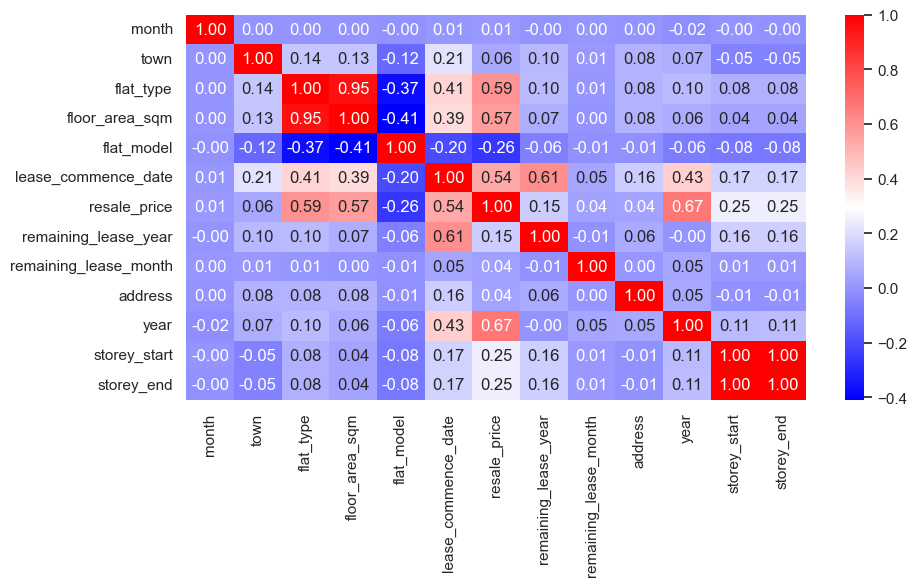

In [41]:
# Checking the Correlation using heatmap

df_corr= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot= True, cmap="bwr", fmt=".2f")
plt.show()

In [42]:
# checking the duplicate values
df.duplicated().sum()

1894

In [43]:
df_original= df.drop_duplicates()
df_original.reset_index(drop= True, inplace= True)

In [44]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns
df_og= df_original.drop(columns=["month","address"])
df_og.tail(2)

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,year,storey_start,storey_end
918658,26,5.0,146.0,3.0,1987,851888.0,62.0,7.0,2024,10,12
918659,26,5.0,142.0,3.0,1987,780000.0,62.0,10.0,2024,7,9


In [45]:
df_og = df_og.dropna()  # Drop rows with missing values
df_og = df_og[~df_og.isin([np.inf, -np.inf])]  # Drop rows with infinite value

In [46]:
df_og["remaining_lease_year"]= df_og["remaining_lease_year"].astype(int)
df_og["remaining_lease_month"]= df_og["remaining_lease_month"].astype(int)
df_og["flat_type"]= df_og["flat_type"].astype(int)
df_og["flat_model"]= df_og["flat_model"].astype(int)
df_og["storey_start"]= df_og["storey_start"].astype(int)
df_og["storey_end"]= df_og["storey_end"].astype(int)
df_og["floor_area_sqm"]= df_og["floor_area_sqm"].astype(int)

df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918660 entries, 0 to 918659
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   town                   918660 non-null  int32  
 1   flat_type              918660 non-null  int32  
 2   floor_area_sqm         918660 non-null  int32  
 3   flat_model             918660 non-null  int32  
 4   lease_commence_date    918660 non-null  int64  
 5   resale_price           918660 non-null  float64
 6   remaining_lease_year   918660 non-null  int32  
 7   remaining_lease_month  918660 non-null  int32  
 8   year                   918660 non-null  int32  
 9   storey_start           918660 non-null  int32  
 10  storey_end             918660 non-null  int32  
dtypes: float64(1), int32(9), int64(1)
memory usage: 45.6 MB


In [47]:
# set the columns
df_og1= df_og[['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [48]:
df_real_og=df_og1.sort_values(by=["year"])

In [49]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

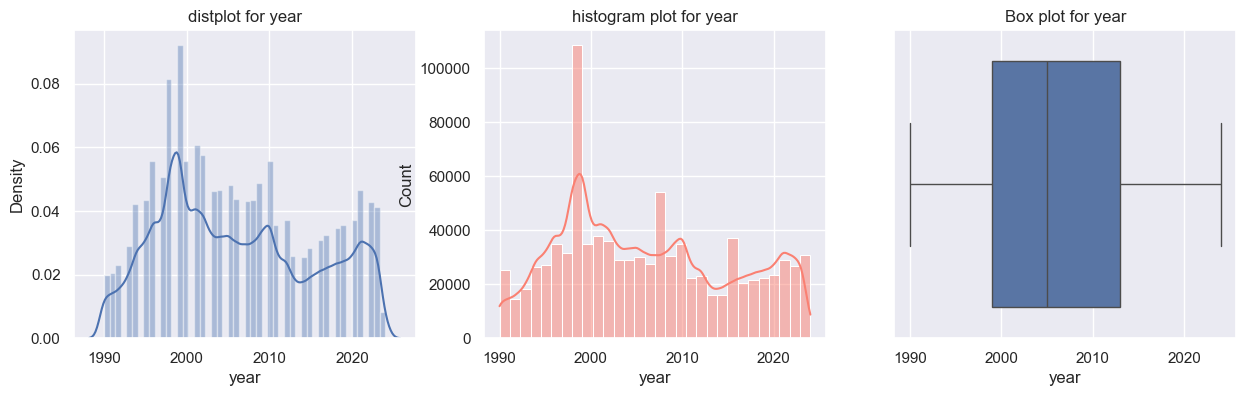

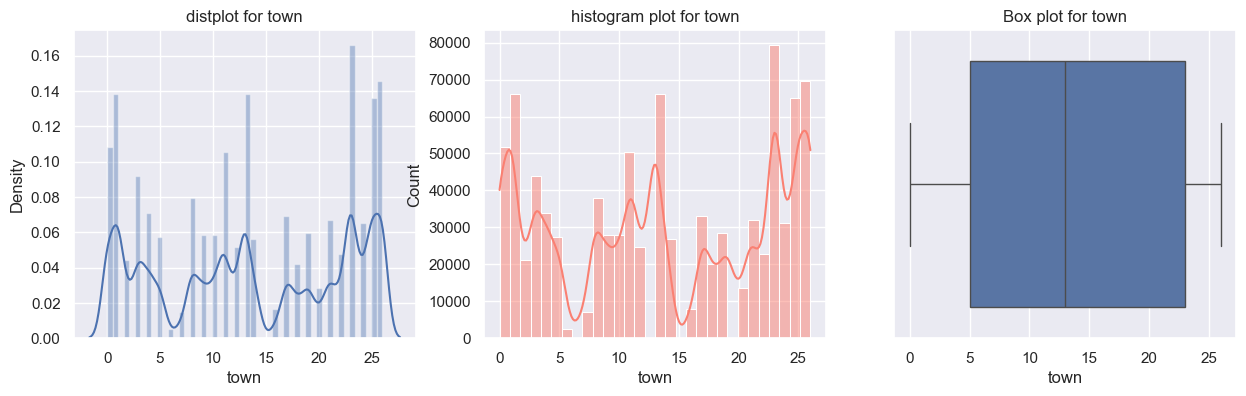

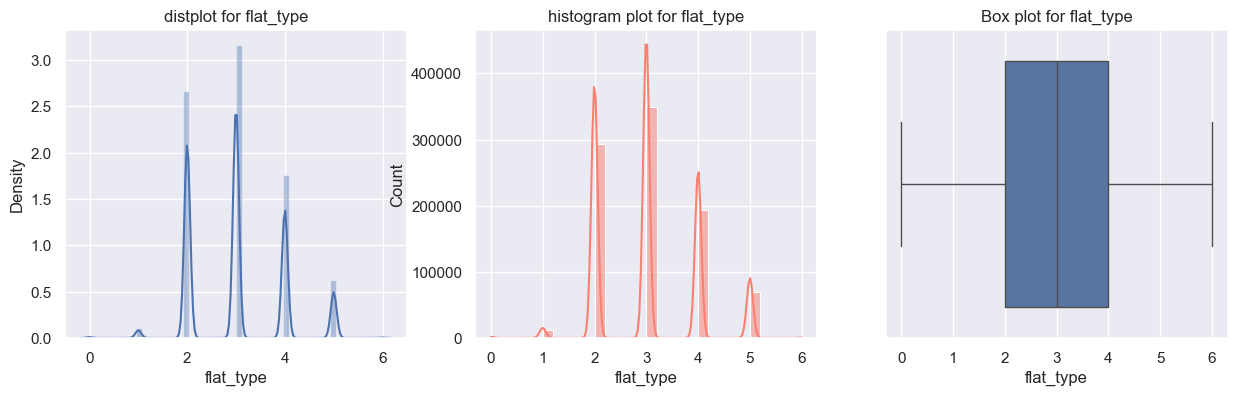

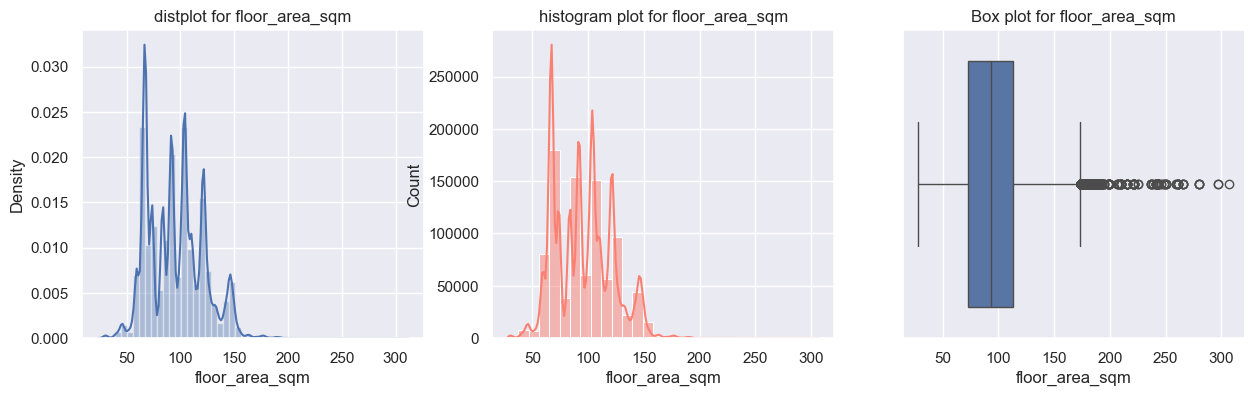

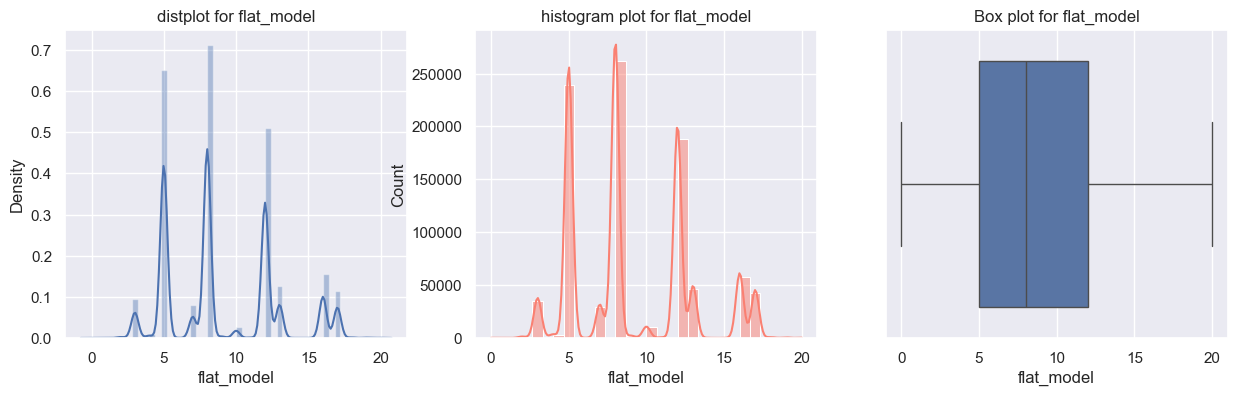

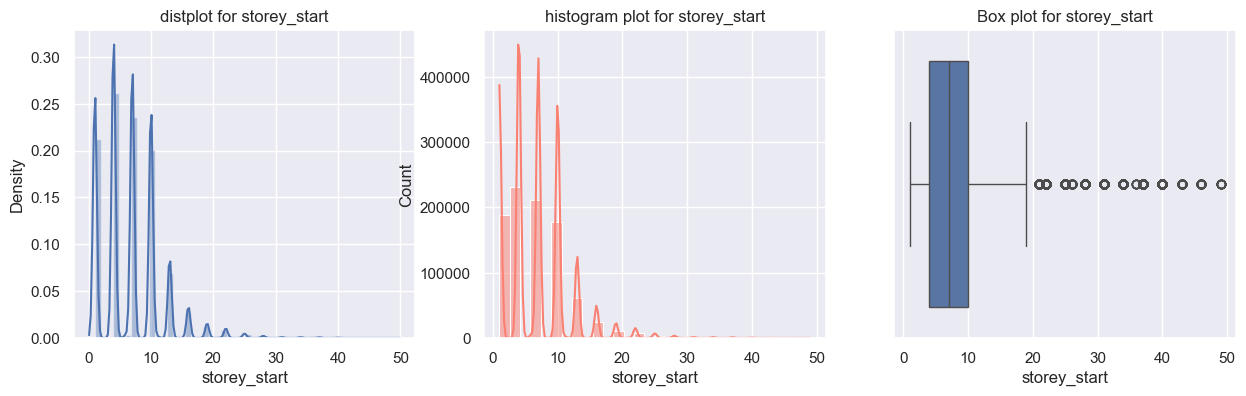

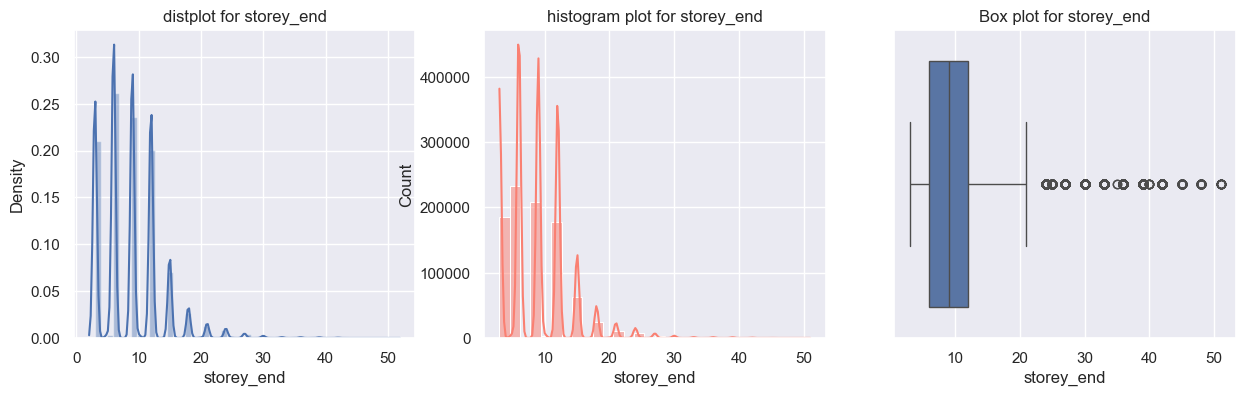

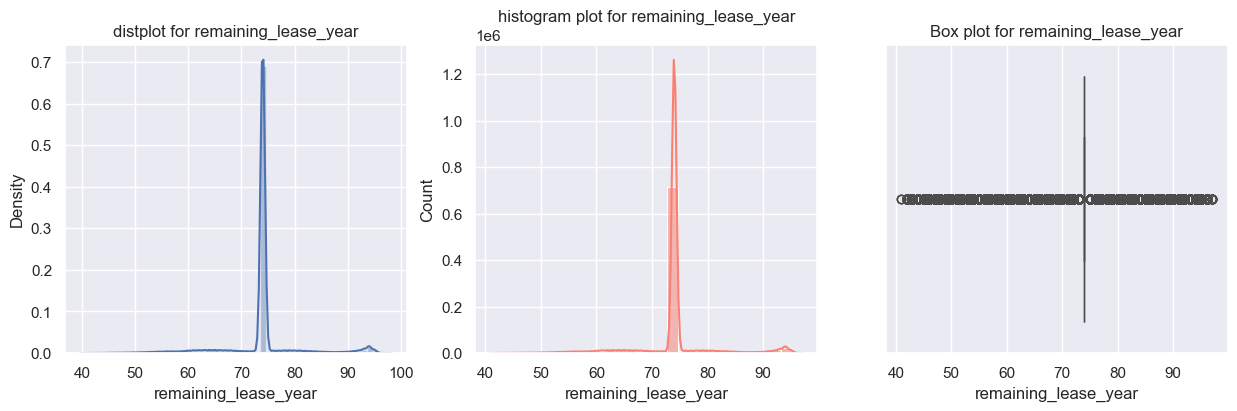

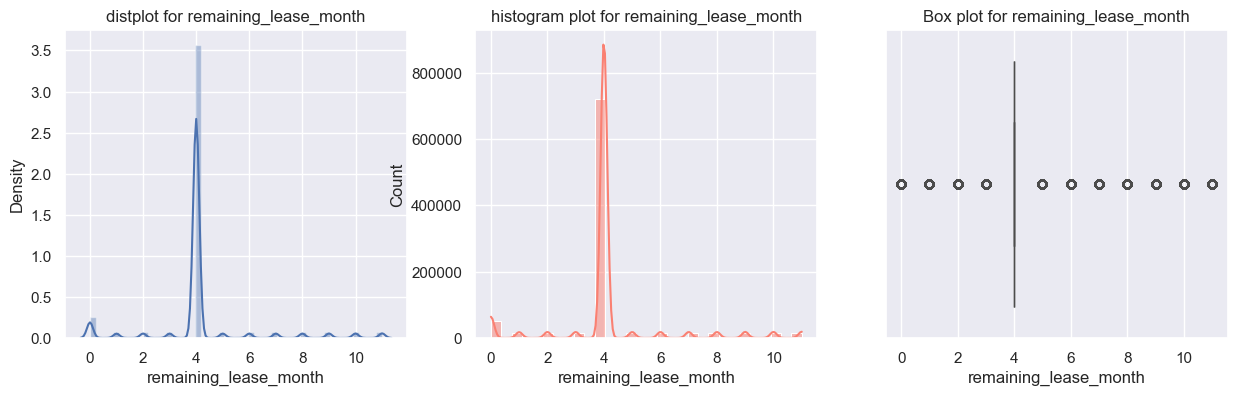

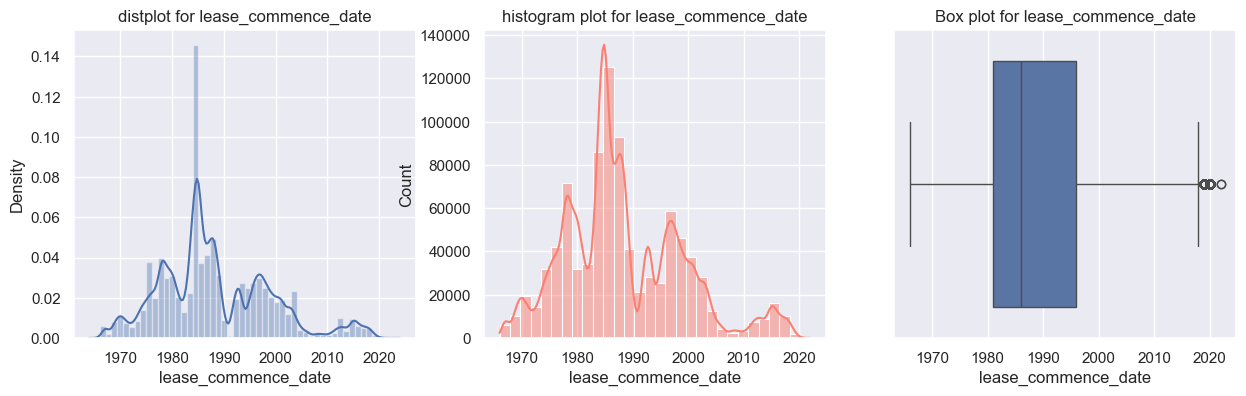

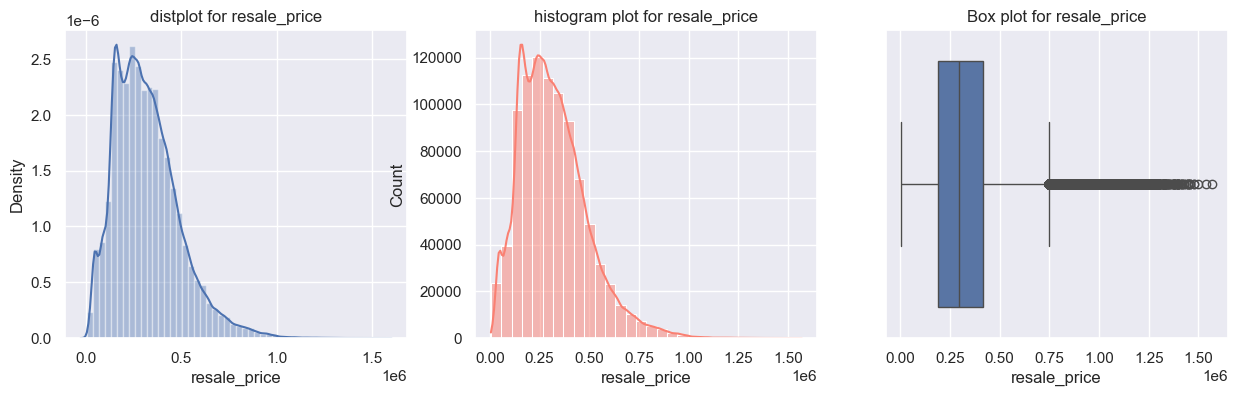

In [50]:
for i in df_real_og.columns:
    plot(df_real_og,i)

In [51]:
df_real_og["storey_start"]= np.log(df_real_og["storey_start"])
df_real_og["storey_end"]= np.log(df_real_og["storey_end"])
df_real_og["resale_price"]= np.log(df_real_og["resale_price"])

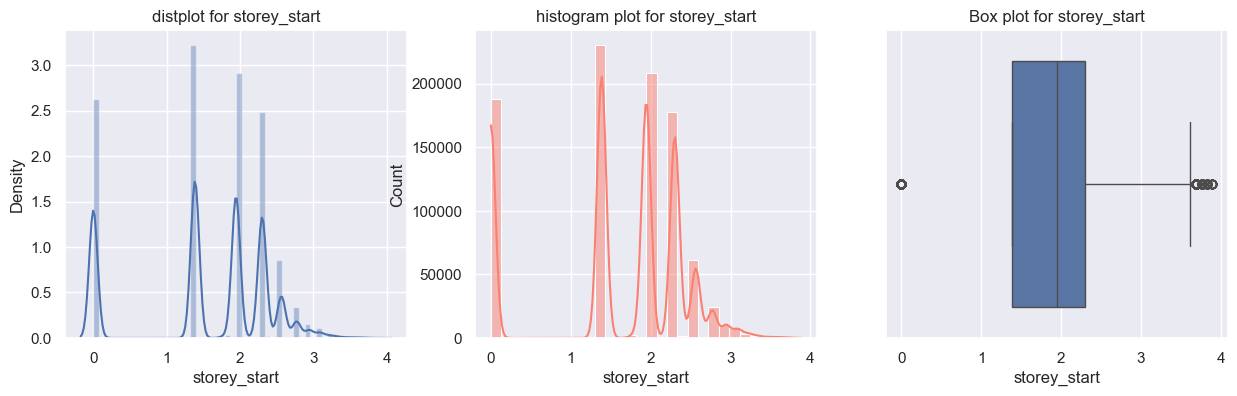

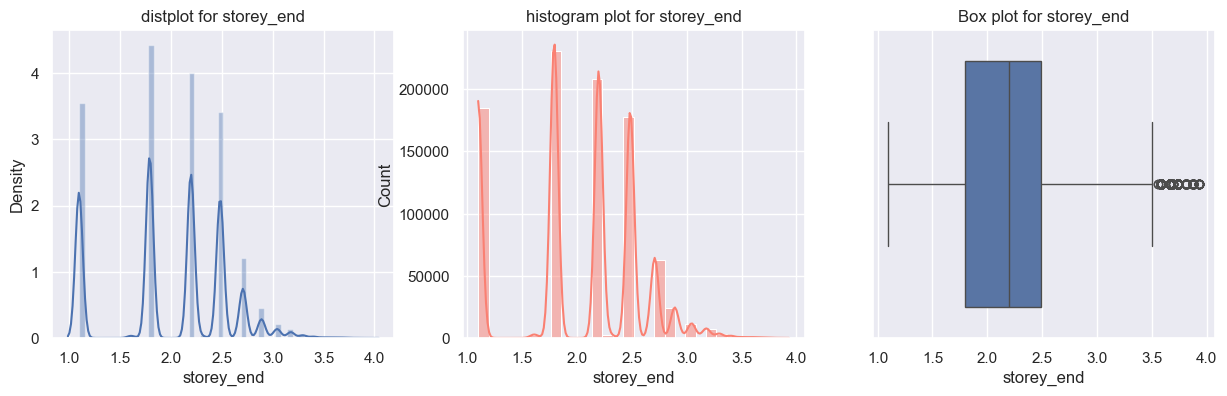

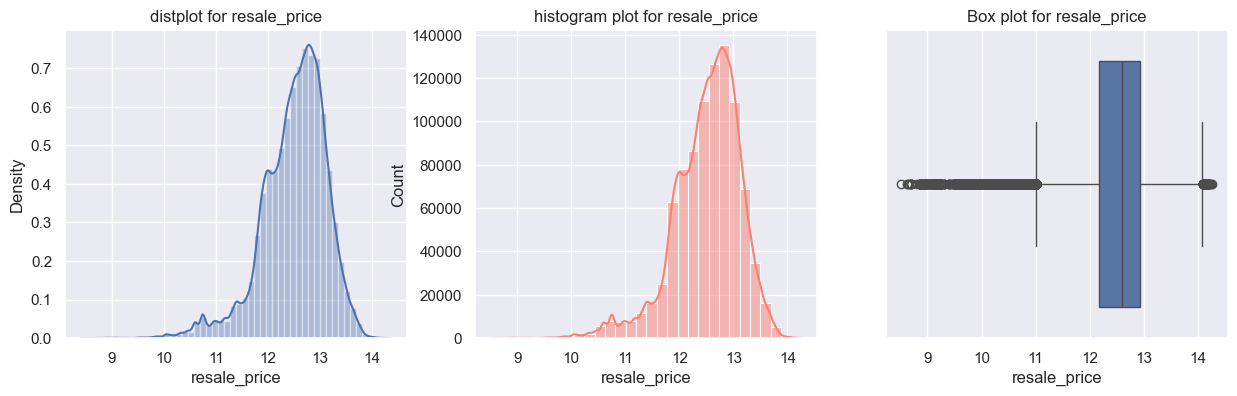

In [52]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_real_og,i)

   920554 non-null  float64
 8   

In [53]:
def outlier(df_real_og,column):
  q1= df_real_og[column].quantile(0.25)
  q3= df_real_og[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df_real_og[column]= df_real_og[column].clip(lower_threshold, upper_threshold)
outlier_columns=["floor_area_sqm","remaining_lease_year","remaining_lease_month","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_real_og,j)

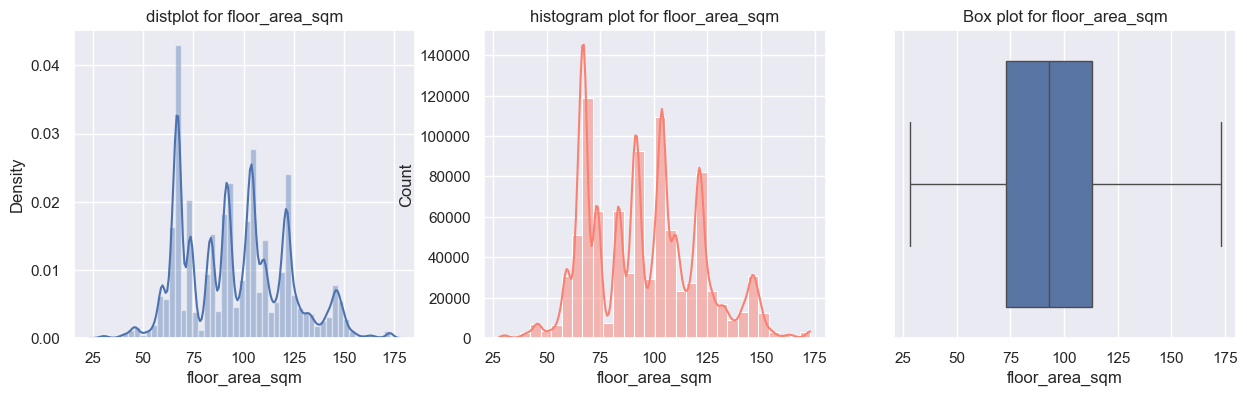

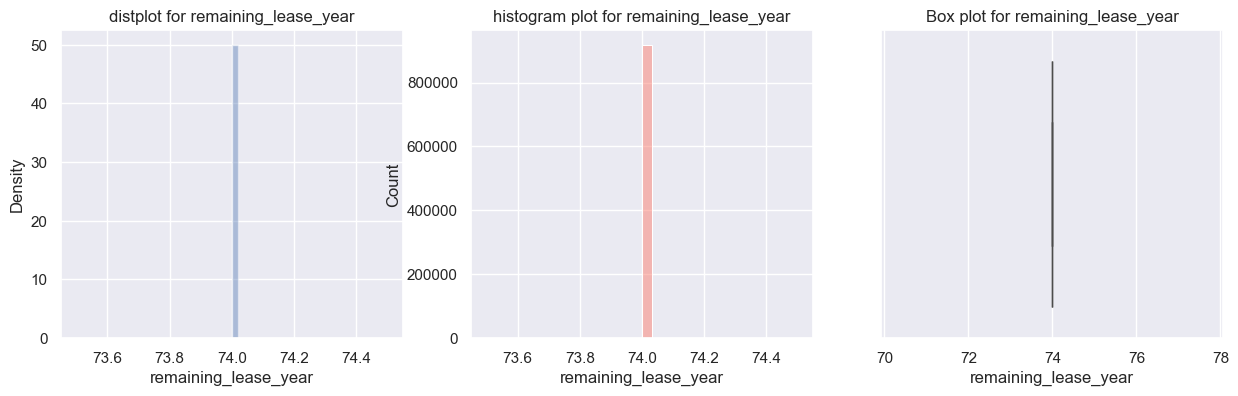

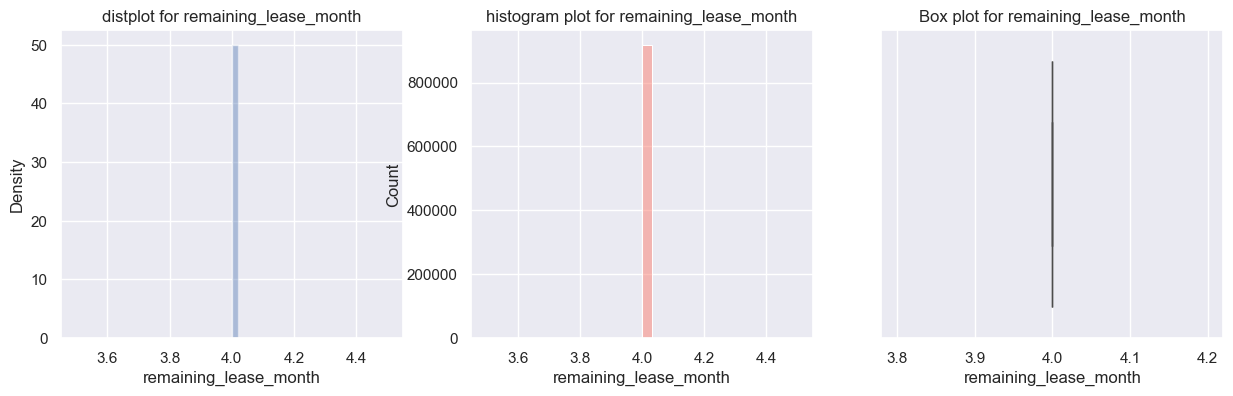

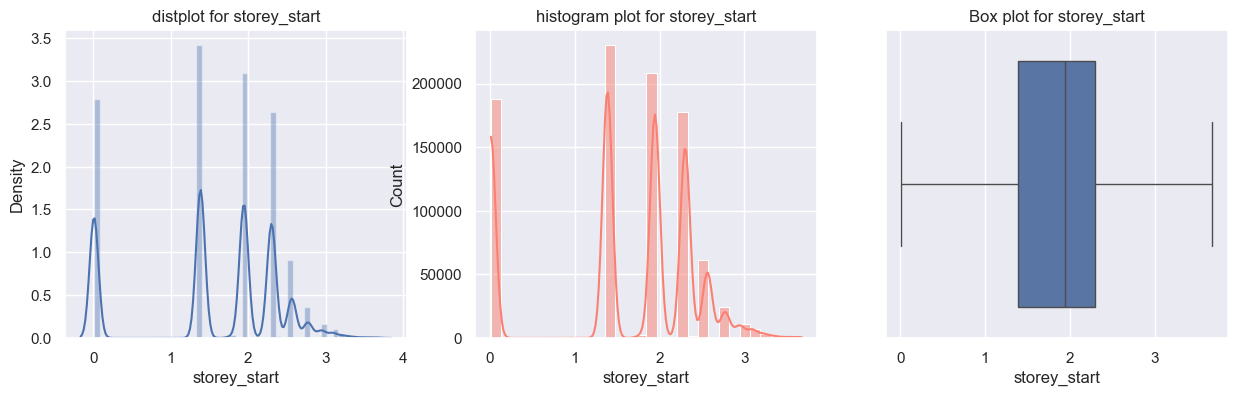

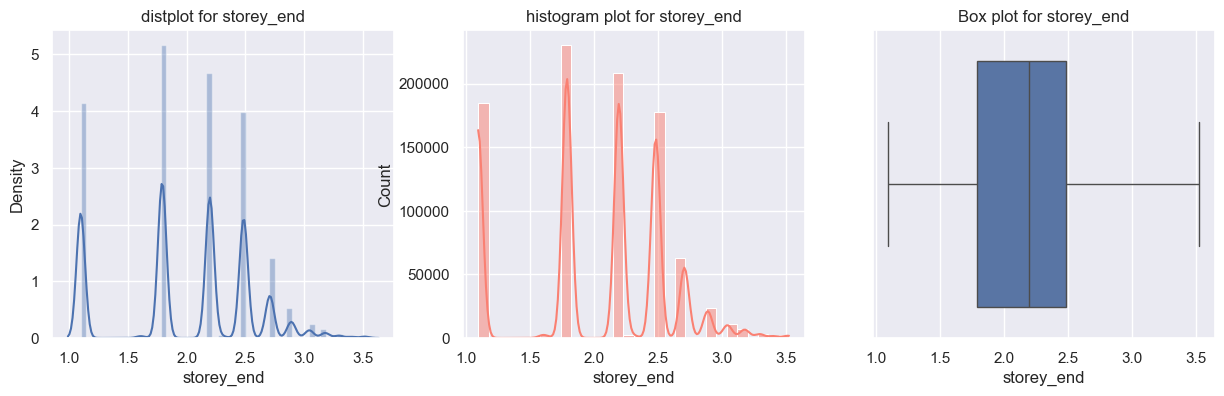

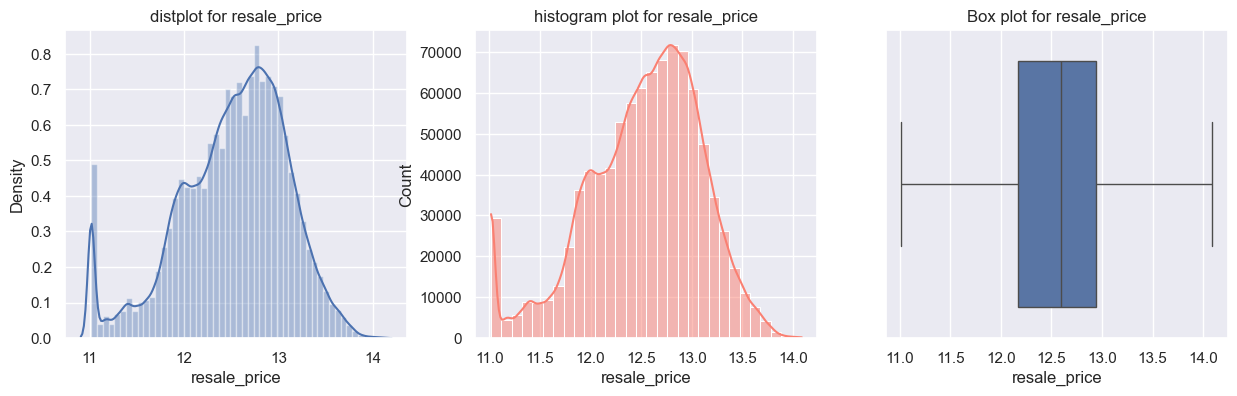

In [54]:
for k in outlier_columns:
    plot(df_real_og,k)

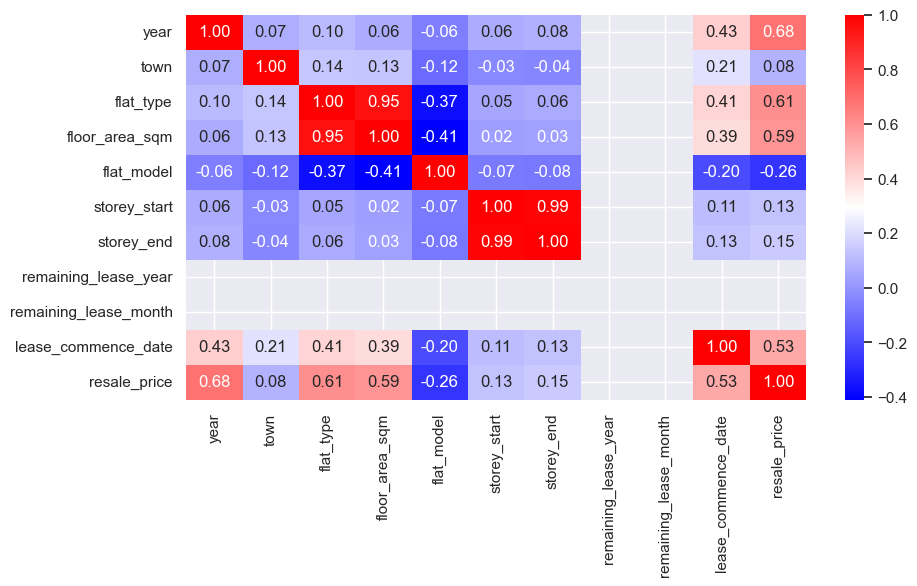

In [55]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_real_og.corr(), annot= True, cmap="bwr", fmt="0.2f")
plt.show()

In [56]:
df_real_og.describe().T

,count,mean,std,min,25%,50%,75%,max
year,918660.0,2006.044919,9.229804,1990.000000,1999.000000,2005.000000,2013.000000,2024.000000
town,918660.0,13.649178,8.798055,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,918660.0,3.014483,0.948459,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,918660.0,95.691182,25.737085,28.000000,73.000000,93.000000,113.000000,173.000000
flat_model,918660.0,8.993001,3.864017,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,918660.0,1.574863,0.900615,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,918660.0,2.008946,0.568953,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,918660.0,74.000000,0.000000,74.000000,74.000000,74.000000,74.000000,74.000000
remaining_lease_month,918660.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000
lease_commence_date,918660.0,1988.209929,10.587275,1966.000000,1981.000000,1986.000000,1996.000000,2022.000000


In [57]:
# save the processed data for the deployment
df_real_og.to_csv('final.csv')

In [58]:
df_real_og.shape

(918660, 11)

In [59]:
df_real_og["lease_commence_date"]= df_real_og["lease_commence_date"].astype(int)
df_real_og["floor_area_sqm"]= df_real_og["floor_area_sqm"].astype(int)

In [76]:
# Reduce the number of rows by 60%
df_perfect = df_real_og.sample(frac=0.5)

# Print the shape of the reduced DataFrame
print(df_perfect.shape)

(459330, 11)


In [77]:
# save the processed data for the deployment
df_perfect.to_csv('lastfinal.csv')

In [78]:
df_perfect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459330 entries, 458144 to 776140
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   459330 non-null  int32  
 1   town                   459330 non-null  int32  
 2   flat_type              459330 non-null  int32  
 3   floor_area_sqm         459330 non-null  int32  
 4   flat_model             459330 non-null  int32  
 5   storey_start           459330 non-null  float64
 6   storey_end             459330 non-null  float64
 7   remaining_lease_year   459330 non-null  int32  
 8   remaining_lease_month  459330 non-null  int32  
 9   lease_commence_date    459330 non-null  int32  
 10  resale_price           459330 non-null  float64
dtypes: float64(3), int32(8)
memory usage: 28.0 MB


In [79]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [81]:
# Train Test Split for model selection
def select_model(df_perfect, algorithm):
    # x, y spliting
    x= df_perfect.drop(columns=["resale_price"])
    y= df_perfect["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [82]:
select_model(df_perfect, LinearRegression)
select_model(df_perfect, DecisionTreeRegressor)
select_model(df_perfect, RandomForestRegressor)



{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.7834263921638799, 'Mean_squared_error': 0.07169597310905303, 'Root_mean_squared_error': 0.2677610373244267, 'Mean_absolute_error': 0.21044401624536757}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.7833079043966684, 'Mean_squared_error': 0.07167366830232648, 'Root_mean_squared_error': 0.2677193835013193, 'Mean_absolute_error': 0.21050090069048236}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9911109718880871, 'Mean_squared_error': 0.002942683214473555, 'Root_mean_squared_error': 0.05424650416822779, 'Mean_absolute_error': 0.03030781189918654}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9649999819598283, 'Mean_squared_error': 0.011576701386370932, 'Root_mean_squared_error': 0.10759508067923428, 'Mean_absolute_error': 0.07367184161661082}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.989593668819042, 'Mean_squared_error': 0.0034449

In [84]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_perfect.drop(columns=["resale_price"])
y= df_perfect["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9736616673305428, 'Mean_squared_error': 0.008711738719084015, 'Root_mean_squared_error': 0.09333669545834594, 'Mean_absolute_error': 0.06529401769908307}


In [85]:
df_perfect.iloc[10456]

year                     2017.000000
town                        1.000000
flat_type                   3.000000
floor_area_sqm             84.000000
flat_model                 16.000000
storey_start                1.945910
storey_end                  2.197225
remaining_lease_year       74.000000
remaining_lease_month       4.000000
lease_commence_date      1986.000000
resale_price               12.821258
Name: 759749, dtype: float64

In [86]:
np.exp(11.512925)

99999.95350298789

In [87]:
user_data = np.array([[0,3,92,12,1980,74,4,1990,1.945910,2.197225]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

11.269328577297415

In [88]:
import pickle
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [89]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [90]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.283058163208816

In [91]:
np.exp(12.313923357750493)

222776.28881715712